In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

In [2]:
# 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submiss_sam = pd.read_csv('sample_submission.csv')

In [3]:
train

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0
...,...,...,...,...,...,...,...,...,...,...
647,TRAIN_647,1,91,64,24,0,29.2,0.192,21,0
648,TRAIN_648,10,122,68,0,0,31.2,0.258,41,0
649,TRAIN_649,8,84,74,31,0,38.3,0.457,39,0
650,TRAIN_650,2,81,72,15,76,30.1,0.547,25,0


In [4]:
def replace_zeros_with_mean(df):
    updated_df = df.copy()  # 데이터프레임의 복사본 생성
    for column in updated_df.columns[2:-1]:  # 첫 번째 열(ID), 임신횟수와 마지막 열(Outcome)을 제외한 모든 열에 대해 반복
        mean_value = updated_df[column][updated_df[column] != 0].mean()  # 0이 아닌 값들의 평균 계산
        updated_df[column] = updated_df[column].replace(0, mean_value)  # 0 값을 평균값으로 대체
    return updated_df

# 0 값을 평균값으로 대체하는 함수 적용
updated_train = replace_zeros_with_mean(train)

updated_test = replace_zeros_with_mean(test)
display(updated_train,updated_test)

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103.0,60.0,33.000000,192.000000,24.0,0.966,33,0
1,TRAIN_001,10,133.0,68.0,29.161926,157.883234,27.0,0.245,36,0
2,TRAIN_002,4,112.0,78.0,40.000000,157.883234,39.4,0.236,38,0
3,TRAIN_003,1,119.0,88.0,41.000000,170.000000,45.3,0.507,26,0
4,TRAIN_004,1,114.0,66.0,36.000000,200.000000,38.1,0.289,21,0
...,...,...,...,...,...,...,...,...,...,...
647,TRAIN_647,1,91.0,64.0,24.000000,157.883234,29.2,0.192,21,0
648,TRAIN_648,10,122.0,68.0,29.161926,157.883234,31.2,0.258,41,0
649,TRAIN_649,8,84.0,74.0,31.000000,157.883234,38.3,0.457,39,0
650,TRAIN_650,2,81.0,72.0,15.000000,76.000000,30.1,0.547,25,0


,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,TEST_000,5,112.0,66.00000,29.107143,142.55,37.800000,0.261,41
1,TEST_001,3,107.0,62.00000,13.000000,48.00,22.900000,0.678,23
2,TEST_002,3,113.0,44.00000,13.000000,142.55,22.400000,0.140,22
3,TEST_003,6,190.0,92.00000,29.107143,142.55,35.500000,0.278,66
4,TEST_004,1,107.0,72.00000,30.000000,82.00,30.800000,0.821,24
...,...,...,...,...,...,...,...,...,...
111,TEST_111,10,111.0,70.00000,27.000000,142.55,27.500000,0.141,40
112,TEST_112,1,119.0,54.00000,13.000000,50.00,22.300000,0.205,24
113,TEST_113,3,187.0,70.00000,22.000000,200.00,36.400000,0.408,36
114,TEST_114,3,100.0,68.00000,23.000000,81.00,31.600000,0.949,28


In [5]:
fig = plt.Figure()

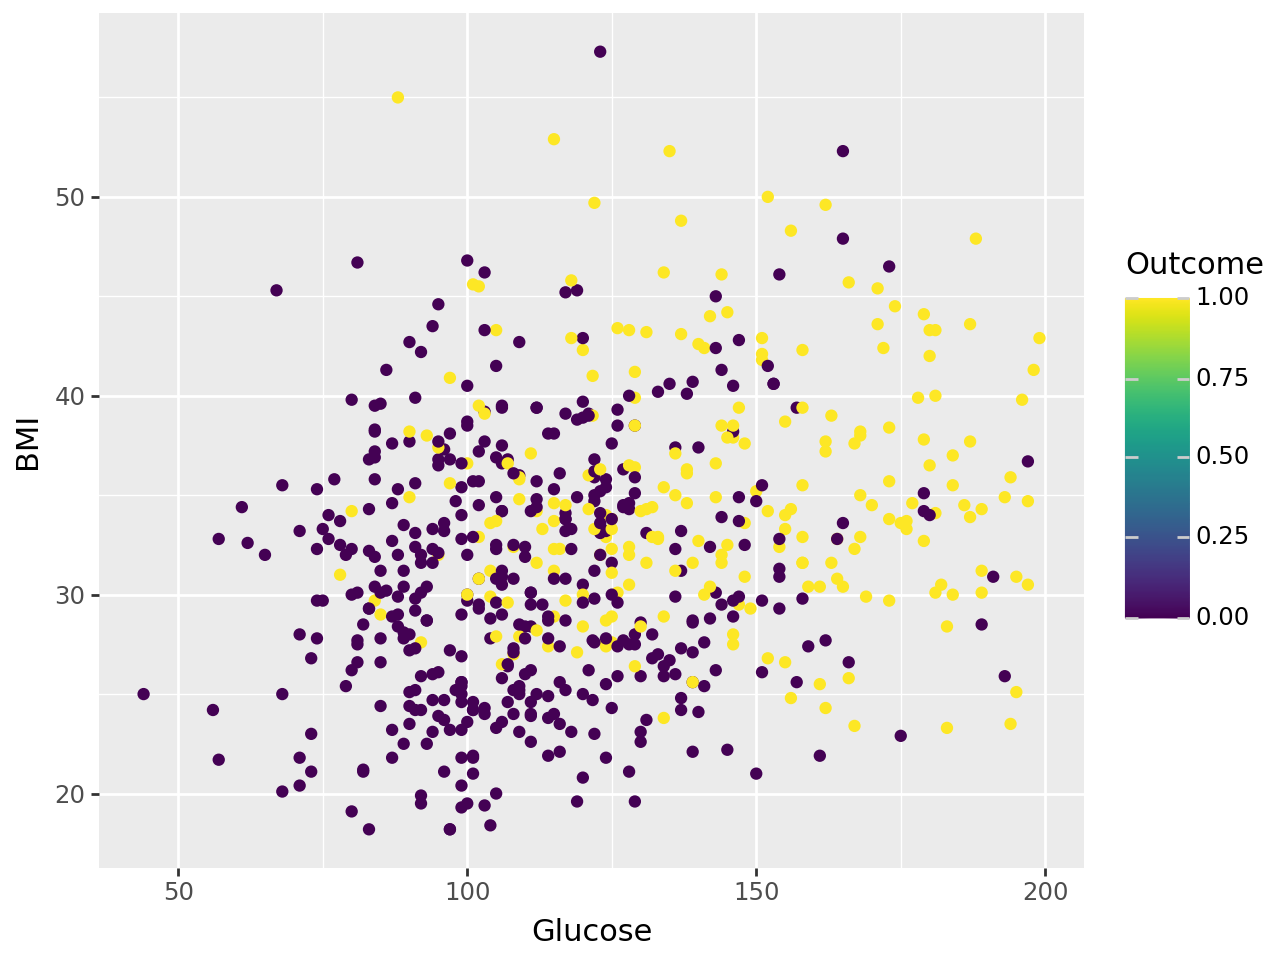

In [6]:
ggplot(updated_train, aes(x='Glucose', y='BMI',color='Outcome')) + geom_point()

In [7]:
# Ensemble Model

In [8]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings(action='ignore')

In [9]:
# 데이터 불러오기
train = pd.read_csv('train.csv').drop('ID',axis=1)
test = pd.read_csv('test.csv')
submiss_sam = pd.read_csv('sample_submission.csv')

In [10]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)   
     
    roc_auc = roc_auc_score(y_test, pred_proba)

    # ROC-AUC print 
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    return confusion

In [11]:
train.rename(columns ={"DiabetesPedigreeFunction":"DPF"},inplace=True)

In [12]:
test.rename(columns ={"DiabetesPedigreeFunction":"DPF"},inplace=True)
feature_names = [cname for cname in train.loc[:,:'Age'].columns]

In [13]:
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=train, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

In [14]:
zero_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
total_count = train['Glucose'].count()

for feature in zero_features:
    zero_count = train[train[feature]==0][feature].count()
    print('{0} 0 number of cases {1}, percent is {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Pregnancies 0 number of cases 87, percent is 13.34 %
Glucose 0 number of cases 4, percent is 0.61 %
BloodPressure 0 number of cases 30, percent is 4.60 %
SkinThickness 0 number of cases 195, percent is 29.91 %
Insulin 0 number of cases 318, percent is 48.77 %
BMI 0 number of cases 7, percent is 1.07 %


In [15]:
diabetes_mean = train[zero_features].mean()
train[zero_features]= train[zero_features].replace(0, diabetes_mean)

In [16]:
X = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [17]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
X_scaled = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [19]:
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=train, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

In [20]:
corr=train.corr().round(2)

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='gist_yarg_r',mask=mask,cbar=True)
plt.title('Correlation Plot')

Text(0.5, 1.0, 'Correlation Plot')

In [21]:
X_train = train.drop('Outcome',axis=1)
y_train = train['Outcome']

from pycaret.classification import *

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

In [22]:
clf1 = setup(data = train, 
             target = 'Outcome',
             preprocess = False)

,Description,Value
0,Session id,3882
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(652, 9)"
4,Transformed data shape,"(652, 9)"
5,Transformed train set shape,"(456, 9)"
6,Transformed test set shape,"(196, 9)"
7,Numeric features,8


In [23]:
top5 = compare_models(sort='AUC',
                      n_select = 5,
                      exclude=['lightgbm','xgboost','dummy','svm','ridge','knn','dt','nb','qda']
                     )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7718,0.8360,0.5979,0.7017,0.6403,0.4768,0.4833,0.4420
lda,Linear Discriminant Analysis,0.7761,0.8345,0.6042,0.7071,0.6455,0.4857,0.4927,0.2100
catboost,CatBoost Classifier,0.7762,0.8164,0.6100,0.7090,0.6496,0.4885,0.4955,3.8110
et,Extra Trees Classifier,0.7717,0.8160,0.5729,0.7179,0.6310,0.4713,0.4804,0.2290
rf,Random Forest Classifier,0.7608,0.8060,0.5971,0.6826,0.6329,0.4577,0.4625,0.2470
gbc,Gradient Boosting Classifier,0.7587,0.7995,0.6158,0.6692,0.6351,0.4571,0.4622,0.2150
ada,Ada Boost Classifier,0.7168,0.7685,0.5412,0.6007,0.5630,0.3577,0.3612,0.1970


In [24]:
catboost = create_model('catboost')
rf = create_model('rf')
lr = create_model('lr')
lda = create_model('lda')
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7826,0.8792,0.5625,0.7500,0.6429,0.4912,0.5017
1,0.7826,0.8542,0.6875,0.6875,0.6875,0.5208,0.5208
2,0.8043,0.8167,0.8125,0.6842,0.7429,0.5868,0.5925
3,0.8478,0.8792,0.6875,0.8462,0.7586,0.6492,0.6567
4,0.7826,0.8875,0.6875,0.6875,0.6875,0.5208,0.5208
5,0.7174,0.7625,0.5000,0.6154,0.5517,0.3486,0.3526
6,0.7778,0.8133,0.6000,0.6923,0.6429,0.4828,0.4854
7,0.7111,0.7155,0.3750,0.6667,0.4800,0.3011,0.3250
8,0.7556,0.7220,0.5000,0.7273,0.5926,0.4264,0.4417


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7826,0.8708,0.6250,0.7143,0.6667,0.5064,0.5089
1,0.7609,0.8604,0.6250,0.6667,0.6452,0.4651,0.4657
2,0.7391,0.8125,0.6875,0.6111,0.6471,0.4413,0.4432
3,0.8261,0.8635,0.6250,0.8333,0.7143,0.5929,0.6056
4,0.8261,0.9104,0.6875,0.7857,0.7333,0.6052,0.6081
5,0.7174,0.7188,0.5625,0.6000,0.5806,0.3679,0.3683
6,0.7333,0.8056,0.5333,0.6154,0.5714,0.3793,0.3814
7,0.7111,0.6940,0.3750,0.6667,0.4800,0.3011,0.3250
8,0.7111,0.6940,0.5625,0.6000,0.5806,0.3607,0.3611


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7391,0.8562,0.5000,0.6667,0.5714,0.3894,0.3977
1,0.8261,0.8812,0.6250,0.8333,0.7143,0.5929,0.6056
2,0.8043,0.8604,0.7500,0.7059,0.7273,0.5749,0.5756
3,0.8261,0.8688,0.7500,0.7500,0.7500,0.6167,0.6167
4,0.8043,0.9042,0.7500,0.7059,0.7273,0.5749,0.5756
5,0.6957,0.7812,0.5000,0.5714,0.5333,0.3090,0.3105
6,0.8000,0.8822,0.6667,0.7143,0.6897,0.5424,0.5431
7,0.6889,0.6746,0.3750,0.6000,0.4615,0.2588,0.2730
8,0.7333,0.7974,0.4375,0.7000,0.5385,0.3647,0.3846


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7391,0.8542,0.5000,0.6667,0.5714,0.3894,0.3977
1,0.8261,0.8812,0.6250,0.8333,0.7143,0.5929,0.6056
2,0.8913,0.8708,0.8750,0.8235,0.8485,0.7639,0.7647
3,0.8043,0.8604,0.7500,0.7059,0.7273,0.5749,0.5756
4,0.8043,0.8979,0.7500,0.7059,0.7273,0.5749,0.5756
5,0.6957,0.7792,0.5000,0.5714,0.5333,0.3090,0.3105
6,0.8000,0.8822,0.6667,0.7143,0.6897,0.5424,0.5431
7,0.6889,0.6724,0.3750,0.6000,0.4615,0.2588,0.2730
8,0.7333,0.7845,0.4375,0.7000,0.5385,0.3647,0.3846


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8043,0.8583,0.6250,0.7692,0.6897,0.5490,0.5553
1,0.7609,0.8417,0.6875,0.6471,0.6667,0.4805,0.4810
2,0.7174,0.8063,0.6875,0.5789,0.6286,0.4032,0.4071
3,0.7174,0.8354,0.5625,0.6000,0.5806,0.3679,0.3683
4,0.8261,0.8917,0.8125,0.7222,0.7647,0.6275,0.6303
5,0.7391,0.7500,0.5625,0.6429,0.6000,0.4077,0.4097
6,0.7556,0.7600,0.5333,0.6667,0.5926,0.4211,0.4264
7,0.7111,0.6703,0.3750,0.6667,0.4800,0.3011,0.3250
8,0.7556,0.7672,0.5625,0.6923,0.6207,0.4432,0.4484


In [25]:
tuned_catboost = tune_model(catboost, optimize = 'AUC')
tuned_rf = tune_model(rf, optimize = 'AUC')
tuned_lr = tune_model(lr, optimize = 'AUC')
tuned_lda = tune_model(lda, optimize = 'AUC')
tuned_gbc = tune_model(gbc, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7391,0.8521,0.5000,0.6667,0.5714,0.3894,0.3977
1,0.7609,0.8625,0.6250,0.6667,0.6452,0.4651,0.4657
2,0.7609,0.8438,0.8125,0.6190,0.7027,0.5087,0.5219
3,0.8261,0.8688,0.6875,0.7857,0.7333,0.6052,0.6081
4,0.8043,0.8979,0.6875,0.7333,0.7097,0.5624,0.5630
5,0.7609,0.7750,0.5625,0.6923,0.6207,0.4488,0.4540
6,0.7111,0.7800,0.6000,0.5625,0.5806,0.3607,0.3611
7,0.7111,0.7069,0.3750,0.6667,0.4800,0.3011,0.3250
8,0.7778,0.7737,0.5000,0.8000,0.6154,0.4706,0.4963


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7609,0.8583,0.6875,0.6471,0.6667,0.4805,0.4810
1,0.8043,0.8750,0.7500,0.7059,0.7273,0.5749,0.5756
2,0.7609,0.8438,0.8750,0.6087,0.7179,0.5217,0.5477
3,0.7826,0.8521,0.8125,0.6500,0.7222,0.5472,0.5564
4,0.8043,0.9062,0.7500,0.7059,0.7273,0.5749,0.5756
5,0.7609,0.8083,0.6875,0.6471,0.6667,0.4805,0.4810
6,0.7333,0.8044,0.7333,0.5789,0.6471,0.4375,0.4454
7,0.7111,0.7263,0.5000,0.6154,0.5517,0.3420,0.3460
8,0.6667,0.7392,0.5625,0.5294,0.5455,0.2827,0.2830


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7391,0.8542,0.6250,0.6250,0.6250,0.4250,0.4250
1,0.7609,0.8812,0.7500,0.6316,0.6857,0.4950,0.4998
2,0.7391,0.8625,0.8750,0.5833,0.7000,0.4851,0.5165
3,0.7826,0.8667,0.7500,0.6667,0.7059,0.5344,0.5367
4,0.8043,0.9083,0.8750,0.6667,0.7568,0.5981,0.6136
5,0.7391,0.7854,0.7500,0.6000,0.6667,0.4567,0.4644
6,0.7778,0.8800,0.8000,0.6316,0.7059,0.5312,0.5408
7,0.6889,0.6703,0.3750,0.6000,0.4615,0.2588,0.2730
8,0.7556,0.7996,0.6250,0.6667,0.6452,0.4590,0.4596


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7174,0.8521,0.5000,0.6154,0.5517,0.3486,0.3526
1,0.8261,0.8792,0.6250,0.8333,0.7143,0.5929,0.6056
2,0.8043,0.8542,0.6875,0.7333,0.7097,0.5624,0.5630
3,0.7826,0.8688,0.6875,0.6875,0.6875,0.5208,0.5208
4,0.8043,0.9021,0.7500,0.7059,0.7273,0.5749,0.5756
5,0.7174,0.7708,0.5000,0.6154,0.5517,0.3486,0.3526
6,0.8000,0.8844,0.6667,0.7143,0.6897,0.5424,0.5431
7,0.6667,0.6724,0.3125,0.5556,0.4000,0.1935,0.2089
8,0.7333,0.7866,0.4375,0.7000,0.5385,0.3647,0.3846


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7391,0.8542,0.5000,0.6667,0.5714,0.3894,0.3977
1,0.8043,0.8854,0.6875,0.7333,0.7097,0.5624,0.5630
2,0.7391,0.8542,0.7500,0.6000,0.6667,0.4567,0.4644
3,0.7826,0.8771,0.6875,0.6875,0.6875,0.5208,0.5208
4,0.8043,0.8771,0.6250,0.7692,0.6897,0.5490,0.5553
5,0.6957,0.7667,0.5625,0.5625,0.5625,0.3292,0.3292
6,0.7333,0.8311,0.6000,0.6000,0.6000,0.4000,0.4000
7,0.6889,0.7069,0.3125,0.6250,0.4167,0.2354,0.2617
8,0.7556,0.7780,0.4375,0.7778,0.5600,0.4086,0.4410


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [26]:
from scipy import stats

In [27]:
stack_model = stack_models(estimator_list = top5, meta_model = top5[0],optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7174,0.8625,0.4375,0.6364,0.5185,0.3281,0.3396
1,0.7609,0.8771,0.6250,0.6667,0.6452,0.4651,0.4657
2,0.8043,0.8479,0.7500,0.7059,0.7273,0.5749,0.5756
3,0.8261,0.8667,0.6875,0.7857,0.7333,0.6052,0.6081
4,0.8043,0.9083,0.6875,0.7333,0.7097,0.5624,0.5630
5,0.6957,0.7604,0.5000,0.5714,0.5333,0.3090,0.3105
6,0.8444,0.8578,0.6667,0.8333,0.7407,0.6316,0.6396
7,0.6889,0.7220,0.3125,0.6250,0.4167,0.2354,0.2617
8,0.7111,0.7457,0.3750,0.6667,0.4800,0.3011,0.3250


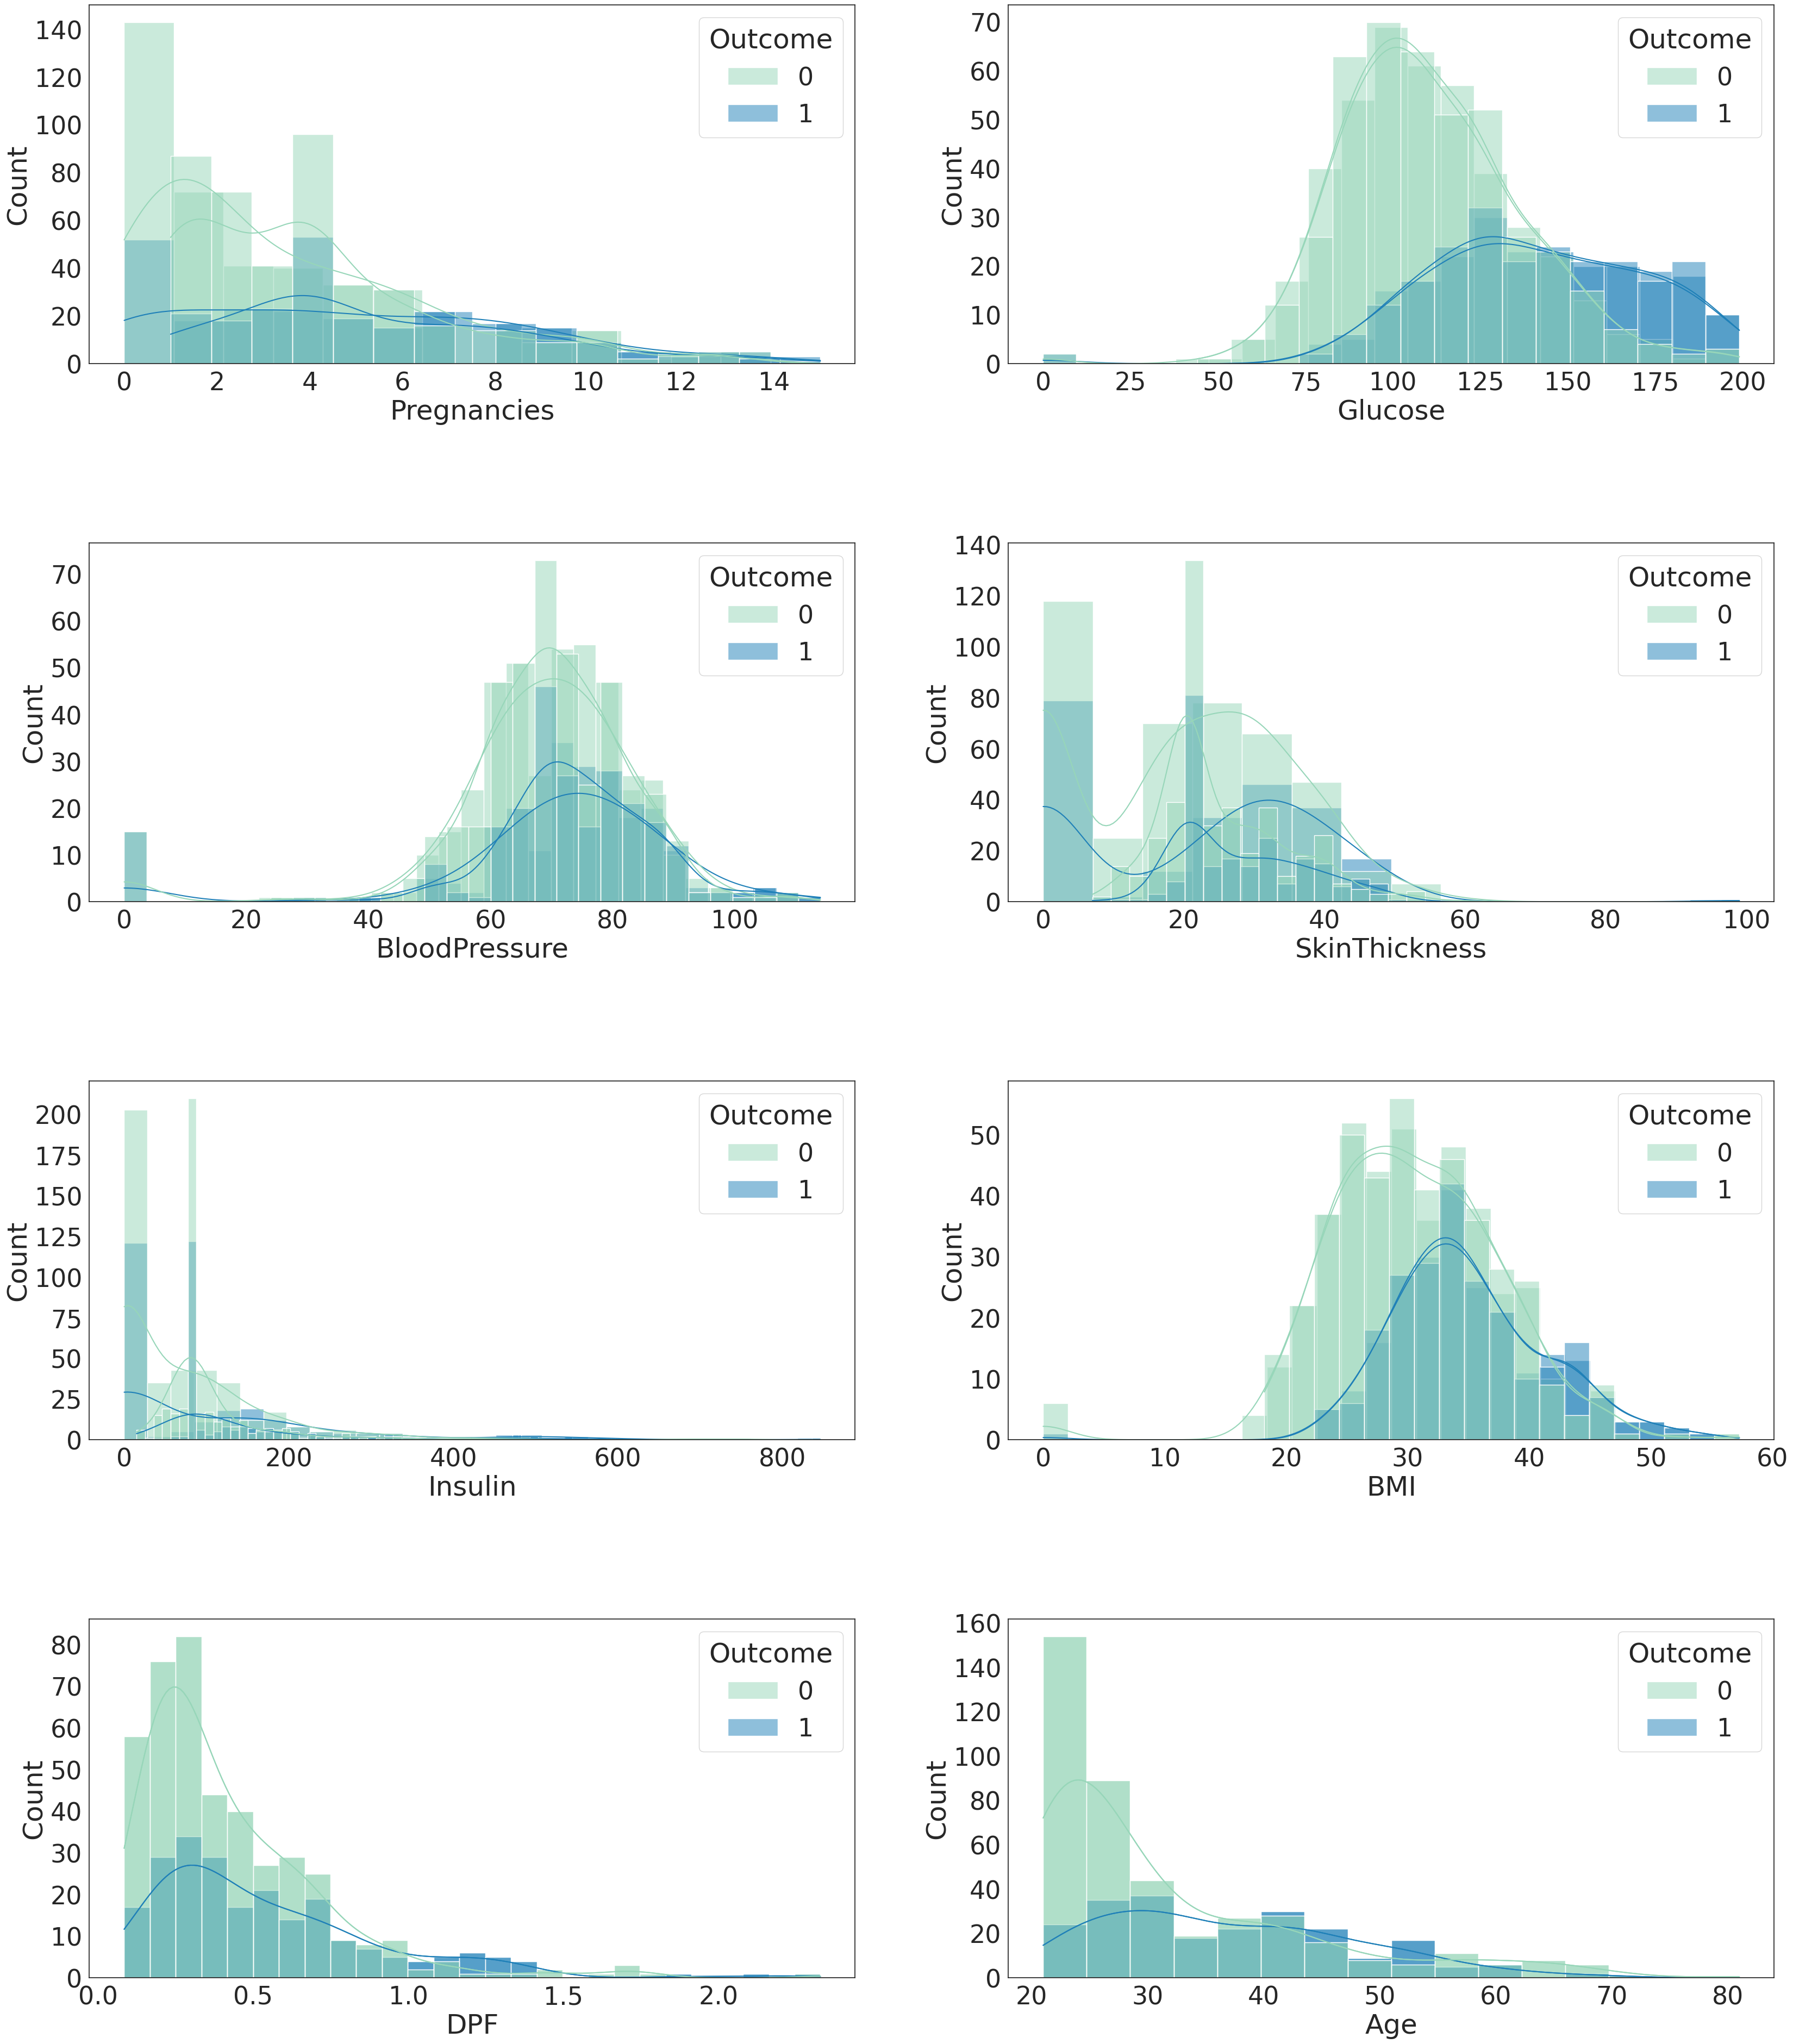

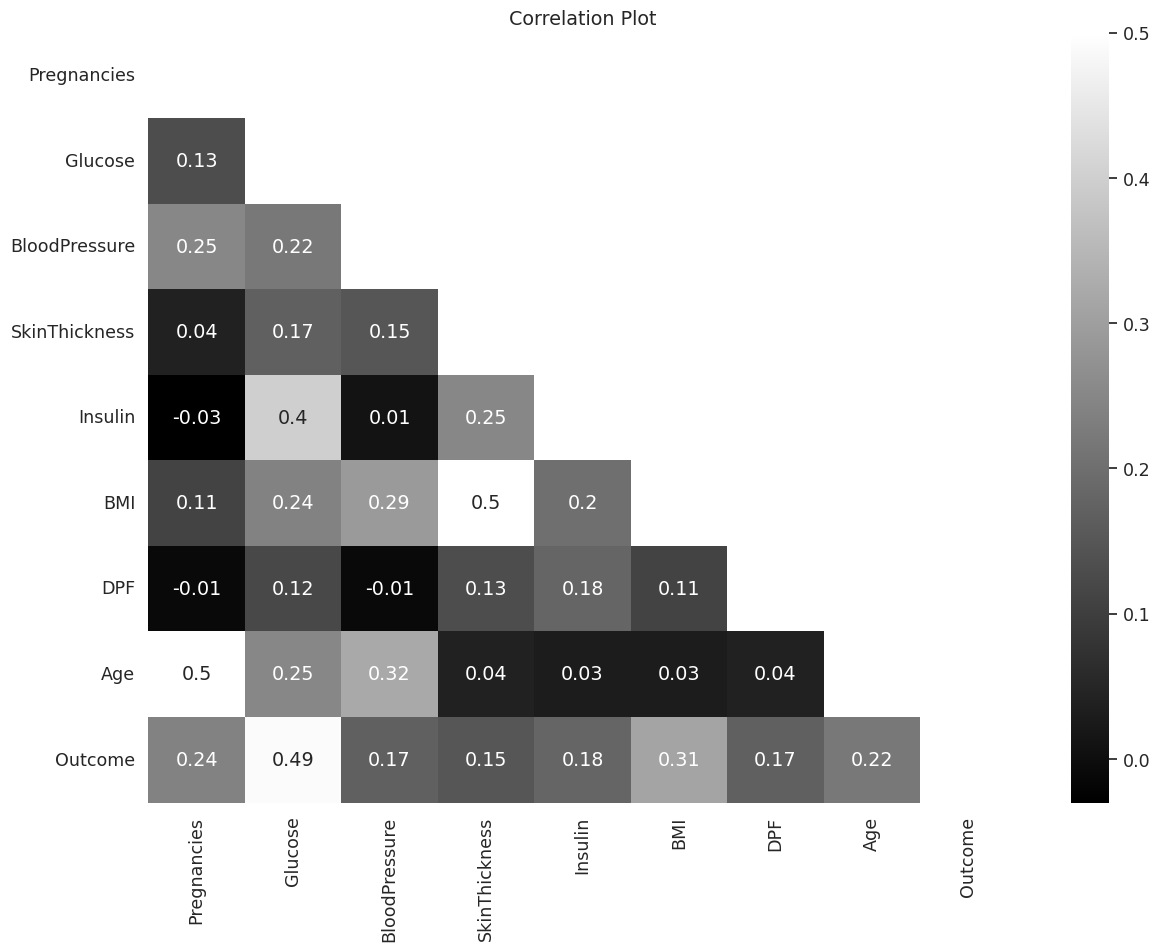

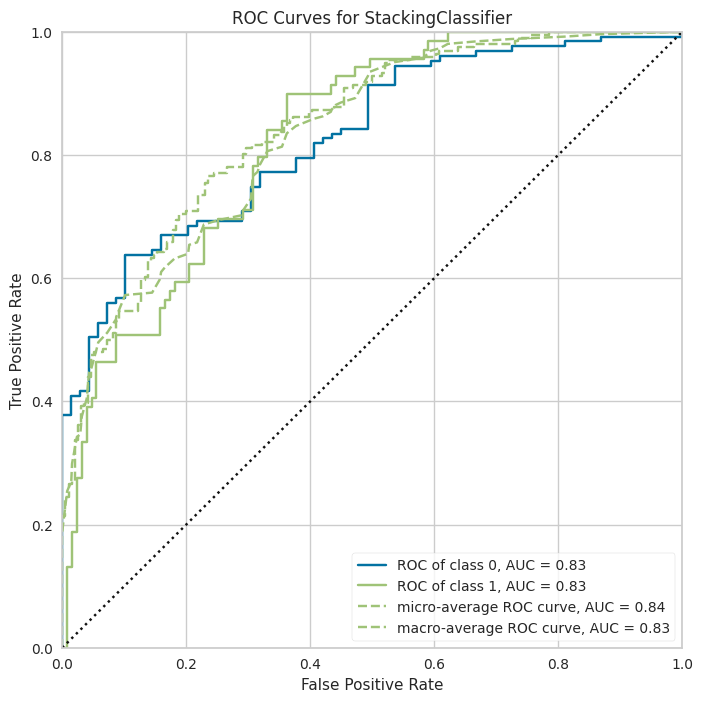

In [28]:
plt.figure(figsize=(8, 8))
plot_model(stack_model, plot = 'auc')

In [30]:
#prediction
pred = stack_model.predict(X_test)
pred_proba = stack_model.predict_proba(X_test)[:,1]
#Accuracy
confusion_stack = get_clf_eval(y_test,pred,pred_proba)

accuracy: 0.8834, precision: 0.8431, recall: 0.7963,    F1: 0.8190, AUC:0.9565


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

Text(0.5, 1.0, 'Confusion Matrix (Stacking)')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

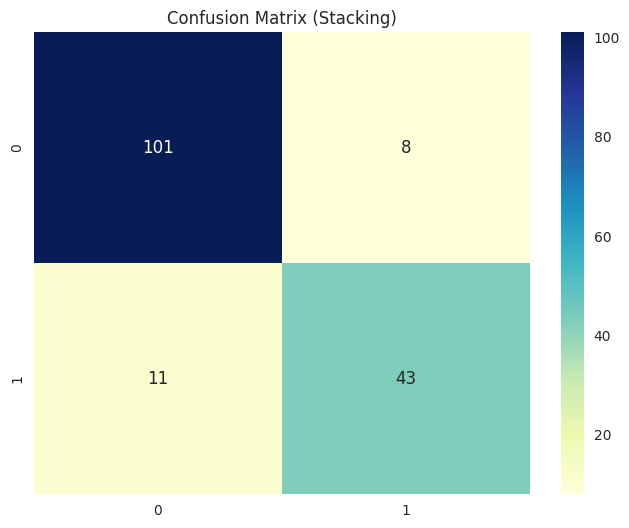

In [31]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_stack, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (Stacking)')

In [32]:
blend_soft = blend_models(estimator_list = top5, optimize = 'AUC',method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7391,0.8667,0.5000,0.6667,0.5714,0.3894,0.3977
1,0.7826,0.8729,0.6875,0.6875,0.6875,0.5208,0.5208
2,0.7826,0.8479,0.8125,0.6500,0.7222,0.5472,0.5564
3,0.8478,0.8625,0.7500,0.8000,0.7742,0.6596,0.6604
4,0.8043,0.9167,0.6875,0.7333,0.7097,0.5624,0.5630
5,0.7174,0.7542,0.5625,0.6000,0.5806,0.3679,0.3683
6,0.8444,0.8489,0.6667,0.8333,0.7407,0.6316,0.6396
7,0.6889,0.7220,0.3125,0.6250,0.4167,0.2354,0.2617
8,0.7111,0.7328,0.3750,0.6667,0.4800,0.3011,0.3250


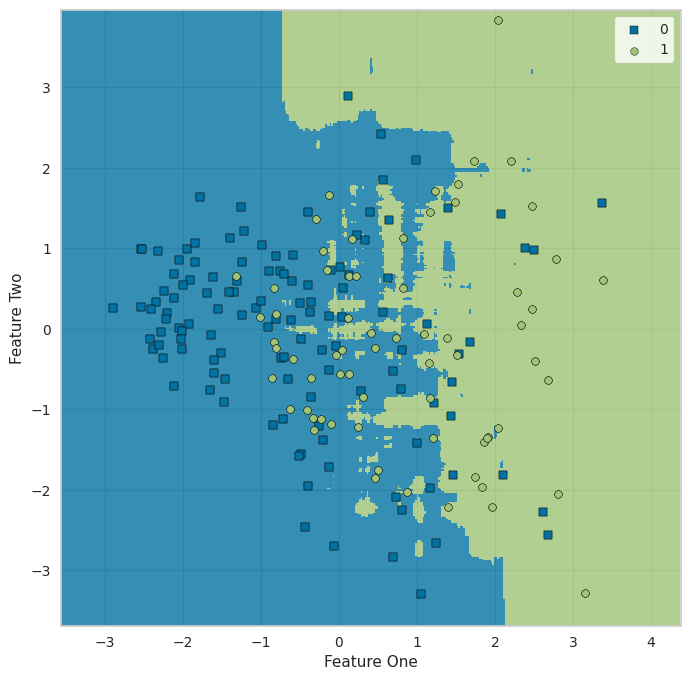

In [33]:
plt.figure(figsize=(8, 8))
plot_model(blend_soft, plot='boundary')

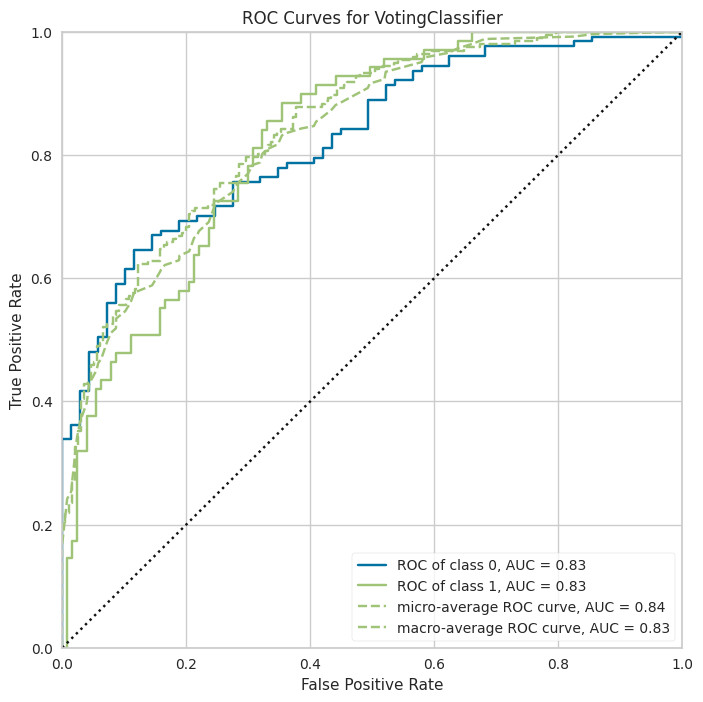

In [34]:
plt.figure(figsize=(8, 8))
plot_model(blend_soft, plot = 'auc')

In [41]:
#prediction
pred = blend_soft.predict(X_test)
pred_proba = blend_soft.predict_proba(X_test)[:,1]
#Accuracy
confusion_soft = get_clf_eval(y_test,pred,pred_proba)

accuracy: 0.9018, precision: 0.8654, recall: 0.8333,    F1: 0.8491, AUC:0.9642


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

Text(0.5, 1.0, 'Confusion Matrix (Soft Blending)')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

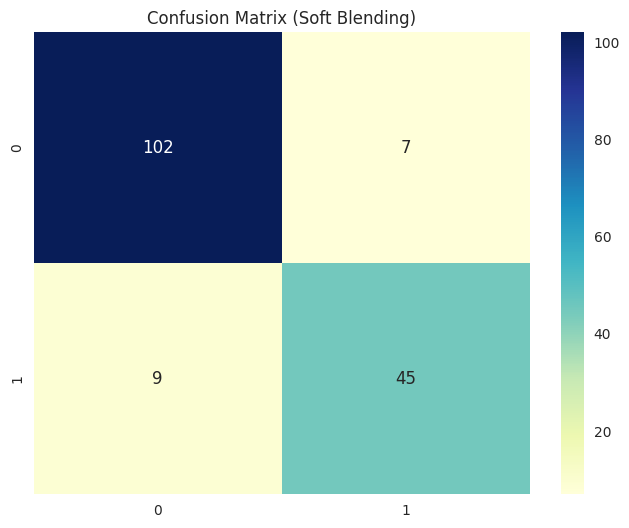

In [36]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_soft, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (Soft Blending)')

In [42]:
pred1 = stack_model.predict(test.drop('ID',axis=1))
submiss_sam.Outcome = pred1
submiss_sam
submiss_sam.to_csv('blend2.csv',index=False)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def replace_zeros_with_mean(df):
    updated_df = df.copy()  # 데이터프레임의 복사본 생성
    for column in updated_df.columns[3:-1]:  # 첫 번째 열(ID), 임신횟수와 마지막 열(Outcome)을 제외한 모든 열에 대해 반복
        mean_value = updated_df[column][updated_df[column] != 0].mean()  # 0이 아닌 값들의 평균 계산
        updated_df[column] = updated_df[column].replace(0, mean_value)  # 0 값을 평균값으로 대체
    return updated_df

# 0 값을 평균값으로 대체하는 함수 적용
updated_train = replace_zeros_with_mean(train)

updated_test = replace_zeros_with_mean(test)



X = updated_train.drop(['ID','Outcome'],axis=1)
updated_test= updated_test.drop(['ID'],axis=1)
y= updated_train.Outcome
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# LightGBM 모델 생성 및 학습
model = LGBMClassifier()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
